In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
print(train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum())

1463 976


<AxesSubplot:xlabel='Item_Weight'>

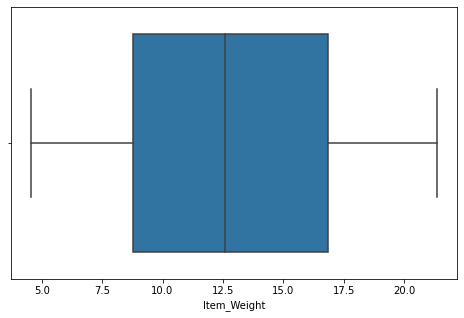

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

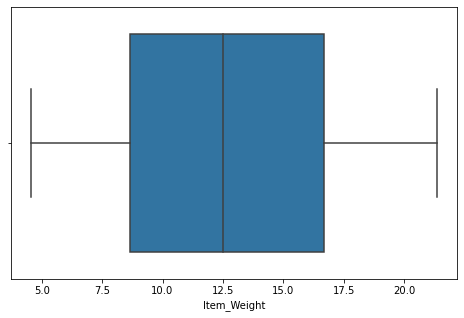

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

In [8]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [9]:
print(train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum())

0 0


In [10]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [11]:
print(train['Outlet_Size'].value_counts())
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [12]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [13]:
print(train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum())

0 0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [20]:
train.drop(['Outlet_Establishment_Year'],axis = 1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,11


# Univariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

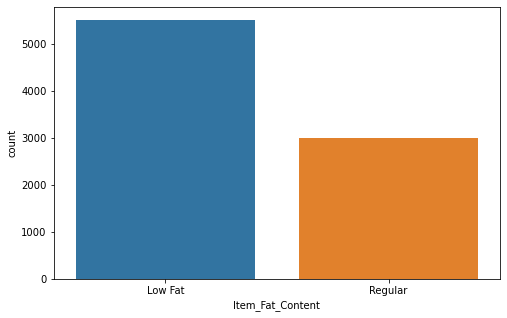

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

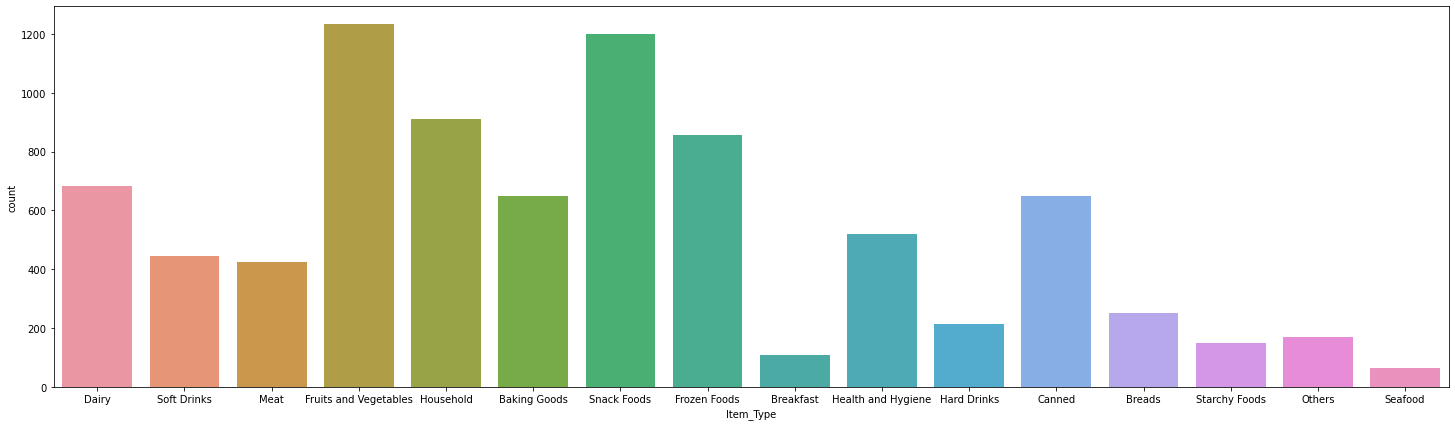

In [22]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

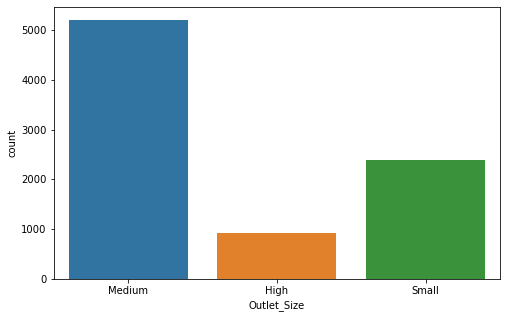

In [23]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

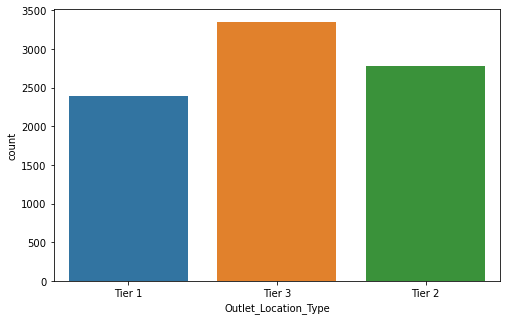

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

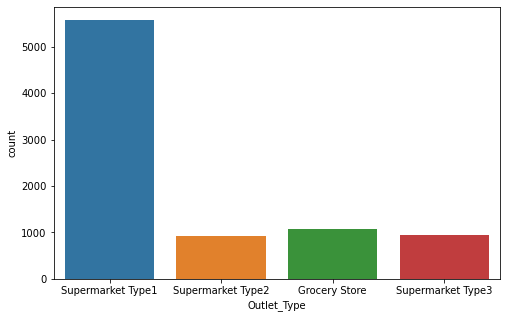

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train)

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

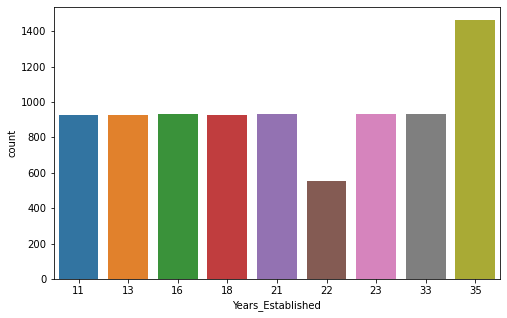

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train)

Text(0, 0.5, 'Item Visibility')

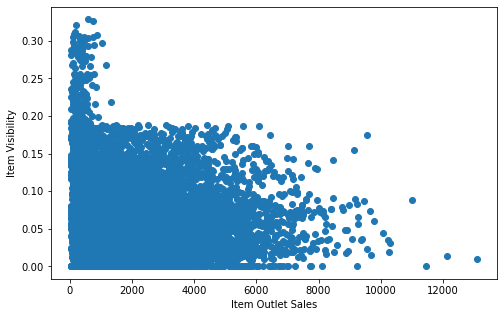

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

In [28]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

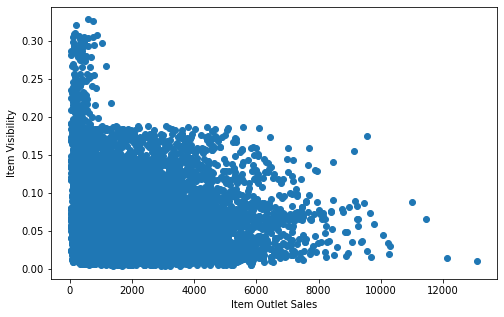

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

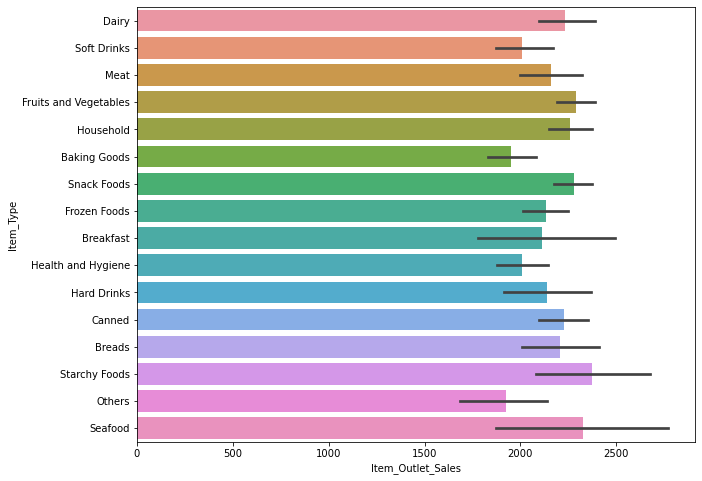

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train)

Text(0, 0.5, 'Item Outlet Sales')

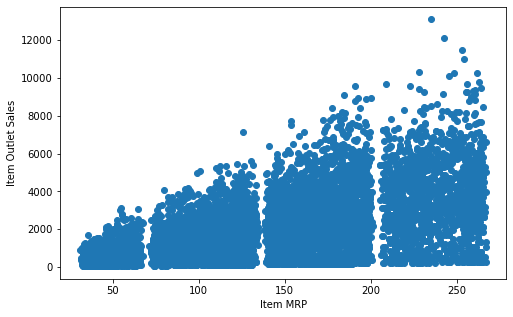

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

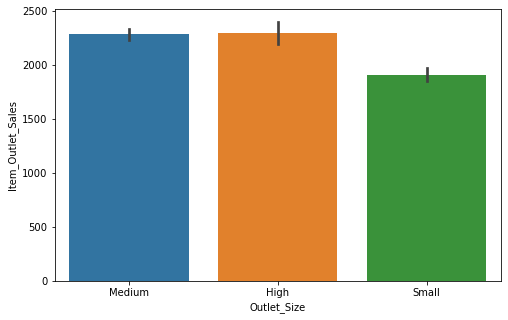

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

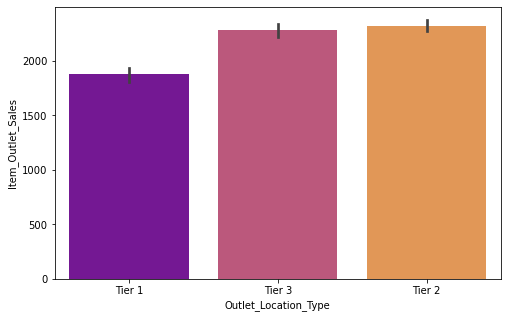

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

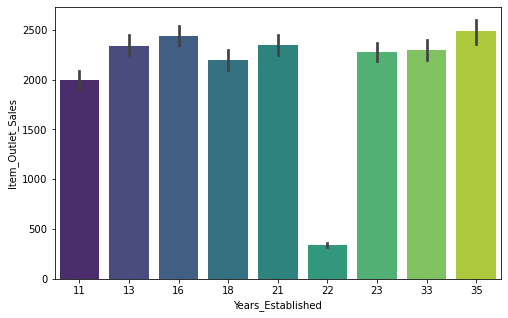

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [36]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [37]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,22
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,33


In [38]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Regular':1, 'Low Fat':0})

In [39]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':0, 'Medium':1,'High':2})

In [40]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast','Breads','Seafood']

In [42]:
def changedItemTypes(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [43]:
train.Item_Type.apply(changedItemTypes)

0           Perishables
1       Non Perishables
2           Perishables
3           Perishables
4       Non Perishables
             ...       
8518    Non Perishables
8519    Non Perishables
8520    Non Perishables
8521    Non Perishables
8522    Non Perishables
Name: Item_Type, Length: 8523, dtype: object

In [44]:
np.where(train.Item_Type.isin(perishables), "Perishables","Non Perishables")

array(['Perishables', 'Non Perishables', 'Perishables', ...,
       'Non Perishables', 'Non Perishables', 'Non Perishables'],
      dtype='<U15')

In [45]:
b = []
for i in range(0, len(train)):
    if(train.Item_Type[i] in perishables):
        b.append("Perishables")
    else:
        b.append("Non Perishables")

In [46]:
train["ChangedItemType"] = pd.Series(b)

In [47]:
train = train.drop(['Item_Type'],axis=1)

In [48]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,ChangedItemType
0,9.30,0,0.016047,249.8092,1,Tier 1,Supermarket Type1,3735.1380,21,Perishables
1,5.92,1,0.019278,48.2692,1,Tier 3,Supermarket Type2,443.4228,11,Non Perishables
2,17.50,0,0.016760,141.6180,1,Tier 1,Supermarket Type1,2097.2700,21,Perishables
3,19.20,1,0.066132,182.0950,1,Tier 3,Grocery Store,732.3800,22,Perishables
4,8.93,0,0.066132,53.8614,2,Tier 3,Supermarket Type1,994.7052,33,Non Perishables


In [49]:
train = pd.get_dummies(train,columns = ['Outlet_Location_Type','Outlet_Type','ChangedItemType'])

In [50]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Years_Established,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ChangedItemType_Non Perishables,ChangedItemType_Perishables
0,9.30,0,0.016047,249.8092,1,3735.1380,21,1,0,0,0,1,0,0,0,1
1,5.92,1,0.019278,48.2692,1,443.4228,11,0,0,1,0,0,1,0,1,0
2,17.50,0,0.016760,141.6180,1,2097.2700,21,1,0,0,0,1,0,0,0,1
3,19.20,1,0.066132,182.0950,1,732.3800,22,0,0,1,1,0,0,0,0,1
4,8.93,0,0.066132,53.8614,2,994.7052,33,0,0,1,0,1,0,0,1,0


In [51]:
X = train.drop(['Item_Outlet_Sales'],axis = 1)
y = train['Item_Outlet_Sales']

In [55]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=123)
X_train.c

In [61]:
stdscale = StandardScaler().fit(X_train)

X_train = stdscale.transform(X_train)

X_test = stdscale.transform(X_test)

In [69]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [70]:
R2 = r2_score(y_test,y_pred)
R2

0.5667355262277987

In [85]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
RMSE = sqrt(metrics.mean_squared_error(y_test, y_pred))

In [86]:
MAE,MSE,RMSE

(760.1326327463838, 1163531.903483401, 1078.6713602777265)

In [76]:
rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [78]:
from sklearn.model_selection  import cross_val_score
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [79]:
cross_val(lr,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.57
0.57
Average LinearRegression(normalize=True) score: 0.56


In [80]:
cross_val(rf,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.53
0.52
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55
